# 实验二 图像的空域与频域滤波
### 一、实验目的
1.	掌握图像滤波的基本定义及目的；
2.	理解空间域滤波的基本原理及方法；
3.	掌握进行图像的空域滤波的方法；
4.	掌握傅里叶变换及逆变换的基本原理方法；
5.	理解频域滤波的基本原理及方法；
6.	掌握进行图像的频域滤波的方法；
7.	掌握基于华为ModelArts开发环境的图像空域与频域滤波操作。

### 二、实验内容与要求

1. 平滑空域滤波

- 1）	读出一幅灰度图像（"lena_gray.gif"），给这幅图像分别加入椒盐噪声和高斯噪声后并与前一张图显示在同一图像窗口中。

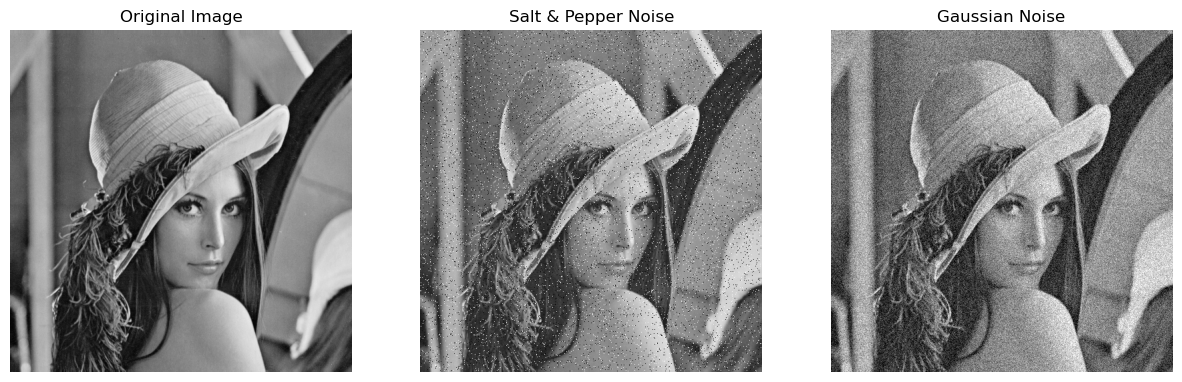

In [1]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

# 将图像转换为灰度图像
img = cv2.imread('./work/lena_gray.png', 0)
# 添加椒盐噪声
def add_salt_and_pepper_noise(image, amount):
    noisy = np.copy(image)
    num_salt = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    coords = list(zip(coords[0], coords[1])) 
    for x,y in coords:     
        noisy[x,y] = 255
    num_pepper = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    coords = list(zip(coords[0], coords[1])) 
    for x,y in coords:     
        noisy[x,y] = 0
    return noisy

img_salt_pepper = add_salt_and_pepper_noise(img, 0.05)

# 添加高斯噪声
def add_gaussian_noise(image, mean=0, std=25):
    row, col = image.shape
    gauss = np.random.normal(mean, std, (row, col))
    noisy = np.copy(image)
    noisy = noisy + gauss
    noisy[noisy < 0] = 0
    noisy[noisy > 255] = 255
    return noisy.astype(np.uint8)

img_gaussian = add_gaussian_noise(img, mean=0, std=25)

# 显示图像
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_salt_pepper, cmap='gray')
axes[1].set_title('Salt & Pepper Noise')
axes[1].axis('off')

axes[2].imshow(img_gaussian, cmap='gray')
axes[2].set_title('Gaussian Noise')
axes[2].axis('off')

plt.show()


- 2）	对加入噪声图像选用不同的平滑（低通）模板做运算，对比不同模板所形成的效果，要求在同一窗口中显示。

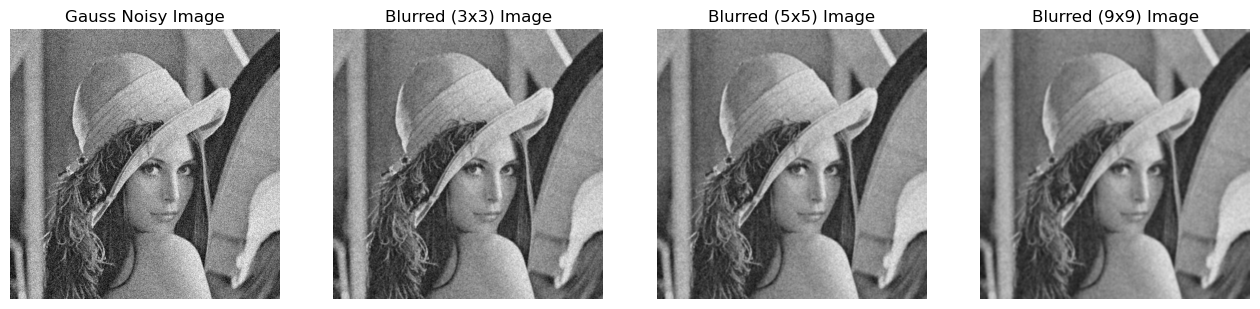

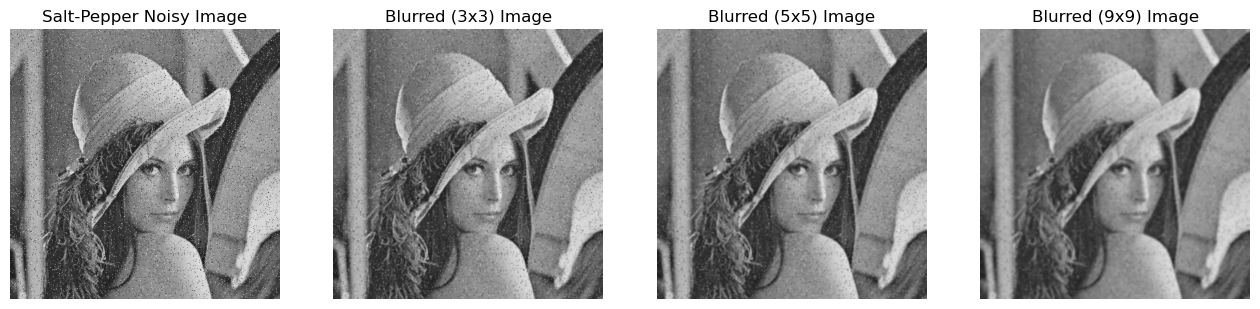

In [2]:
# 填入代码，并展示运行结果
imgg_blur_3x3 = cv2.GaussianBlur(img_gaussian, (3, 3), 0)
imgg_blur_5x5 = cv2.GaussianBlur(img_gaussian, (5, 5), 0)
imgg_blur_9x9 = cv2.GaussianBlur(img_gaussian, (9, 9), 0)

imgsp_blur_3x3 = cv2.GaussianBlur(img_salt_pepper, (3, 3), 0)
imgsp_blur_5x5 = cv2.GaussianBlur(img_salt_pepper, (5, 5), 0)
imgsp_blur_9x9 = cv2.GaussianBlur(img_salt_pepper, (9, 9), 0)
# 显示图像
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
axes[0].imshow(cv2.cvtColor(img_gaussian, cv2.COLOR_BGR2RGB))
axes[0].set_title('Gauss Noisy Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(imgg_blur_3x3, cv2.COLOR_BGR2RGB))
axes[1].set_title('Blurred (3x3) Image')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(imgg_blur_5x5, cv2.COLOR_BGR2RGB))
axes[2].set_title('Blurred (5x5) Image')
axes[2].axis('off')

axes[3].imshow(cv2.cvtColor(imgg_blur_9x9, cv2.COLOR_BGR2RGB))
axes[3].set_title('Blurred (9x9) Image')
axes[3].axis('off')

fig1, axes1 = plt.subplots(1, 4, figsize=(16, 6))
axes1[0].imshow(cv2.cvtColor(img_salt_pepper, cv2.COLOR_BGR2RGB))
axes1[0].set_title('Salt-Pepper Noisy Image')
axes1[0].axis('off')

axes1[1].imshow(cv2.cvtColor(imgsp_blur_3x3, cv2.COLOR_BGR2RGB))
axes1[1].set_title('Blurred (3x3) Image')
axes1[1].axis('off')

axes1[2].imshow(cv2.cvtColor(imgsp_blur_5x5, cv2.COLOR_BGR2RGB))
axes1[2].set_title('Blurred (5x5) Image')
axes1[2].axis('off')

axes1[3].imshow(cv2.cvtColor(imgsp_blur_9x9, cv2.COLOR_BGR2RGB))
axes1[3].set_title('Blurred (9x9) Image')
axes1[3].axis('off')

plt.show()

2. 锐化空域滤波

- 1）读出一幅灰度图像（"lena_gray.gif"），采用$ 3\times3 $拉普拉斯算子$w=[1,1,1;1,-8,1;1,1,1]$对其进行滤波。



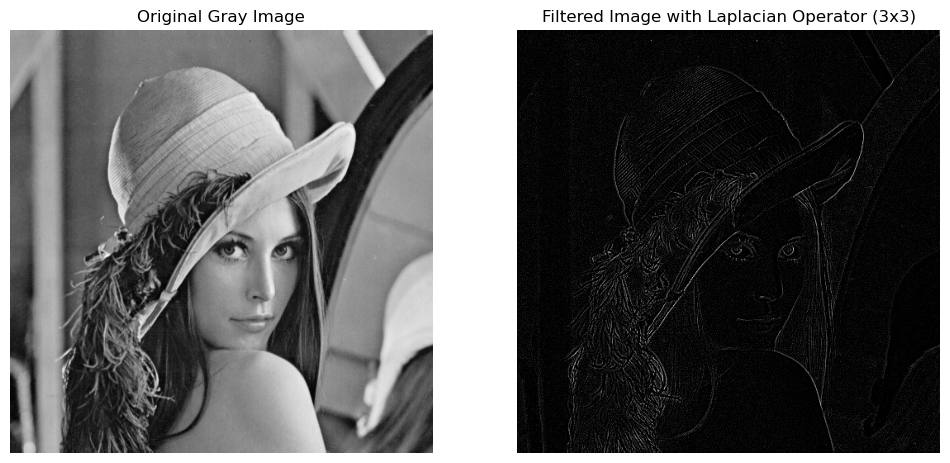

In [3]:
# 填入代码，并展示运行结果
#定义拉普拉斯算子
laplacian_kernel = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])
# 应用拉普拉斯算子进行滤波
img_laplacian = cv2.filter2D(img, -1, laplacian_kernel)

# 显示原始图像和滤波后的图像
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Gray Image')
axes[0].axis('off')

axes[1].imshow(img_laplacian, cmap='gray')
axes[1].set_title('Filtered Image with Laplacian Operator (3x3)')
axes[1].axis('off')

plt.show()

- 2）编写函数$w = genlaplacian(n)$，自动产生任一奇数尺寸$n$的拉普拉斯算子，如$5\times5$的拉普拉斯算子

$$
w=
\left[
\begin{matrix}
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & -24 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1\\
\end{matrix}
\right]
$$

In [4]:
# 填入代码，并展示运行结果
def genlaplacian(n):
    if n % 2 == 0:
        raise ValueError("n必须为奇数")
    
    # 初始化拉普拉斯算子  
    laplacian = np.zeros((n, n), dtype=int)  
      
    # 设置中心周围的元素为1，中心元素为-(n^2 - 1)  
    center_row, center_col = n // 2, n // 2  
    for i in range(n):  
        for j in range(n):  
            if i != center_row or j != center_col:  
                laplacian[i, j] = 1  
    laplacian[center_row, center_col] = -(n**2 - 1)  
    return laplacian

# 生成5x5的拉普拉斯算子
laplacian_5x5 = genlaplacian(5)

print("5x5 拉普拉斯算子:")
print(laplacian_5x5)

5x5 拉普拉斯算子:
[[  1   1   1   1   1]
 [  1   1   1   1   1]
 [  1   1 -24   1   1]
 [  1   1   1   1   1]
 [  1   1   1   1   1]]


3. 傅里叶变换
- 1）读出一幅灰度图像（"lena_gray.gif"），对其进行快速傅里叶变换，分别显示其幅度图像和相位图像。

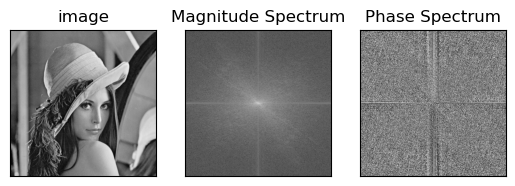

In [5]:
# 填入代码，并展示运行结果
# 进行快速傅里叶变换
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# 计算幅度谱和相位谱
magnitude_spectrum = 20*np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)

# 显示幅度图像
plt.subplot(131),plt.imshow(img, cmap='gray')
plt.title('image'), plt.xticks([]), plt.yticks([])

# 显示幅度图像
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

# 显示相位图像
plt.subplot(133),plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

 - 2）仅对相位部分进行傅里叶逆变换后查看结果图像。

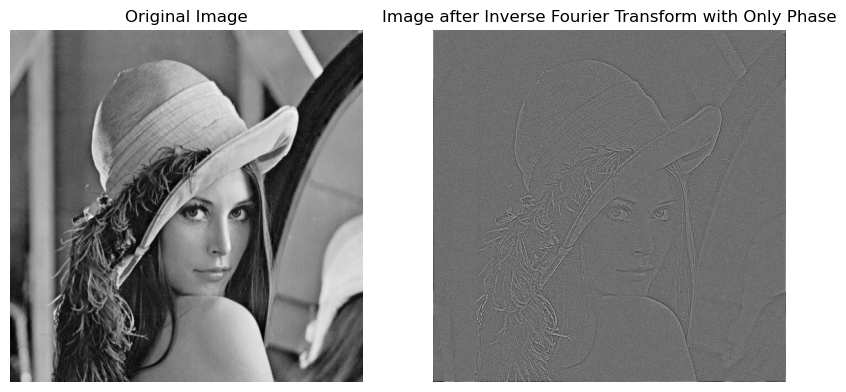

In [6]:
# 填入代码，并展示运行结果
# 创建一个新的复数矩阵，其中振幅为1，相位为原始相位  
new_fshift = np.ones_like(fshift, dtype=np.complex64) * np.exp(1j * phase_spectrum)  
  
# 对新的复数矩阵进行傅里叶逆变换  
new_img = np.fft.ifftshift(new_fshift)  
new_img_ifft = np.fft.ifft2(new_img)  
  
# 由于逆变换的结果是复数，我们取其实部作为最终的图像  
new_img_ifft = np.real(new_img_ifft)  
  
# 标准化到0-255范围并转换为uint8类型以显示图像  
new_img_ifft = cv2.normalize(new_img_ifft, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)  
  
# 显示原始图像和仅相位逆变换后的图像  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1)  
plt.imshow(img, cmap='gray')  
plt.title('Original Image')  
plt.axis('off')  
  
plt.subplot(1, 2, 2)  
plt.imshow(new_img_ifft, cmap='gray')  
plt.title('Image after Inverse Fourier Transform with Only Phase')  
plt.axis('off')  
  
plt.show()

 - 3）仅对幅度部分进行傅里叶逆变换后查看结果图像。

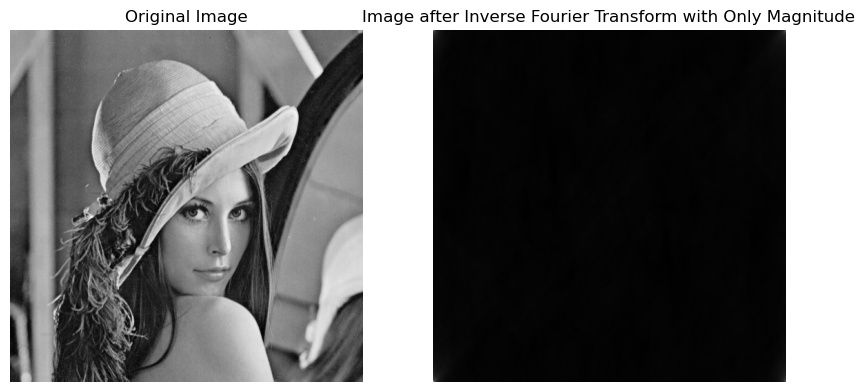

In [7]:
# 填入代码，并展示运行结果
# 创建一个新的复数矩阵，其中幅度为原始幅度，相位为0  
new_fshift = magnitude_spectrum.astype(np.float32)  
# 由于magnitude_spectrum是对数变换的结果，需要将其转换回线性幅度  
new_fshift = np.exp(new_fshift / 20)  
# 将幅度转换为复数形式，相位为0（即实数）  
new_fshift = new_fshift * np.exp(0j)  
  
# 对新的复数矩阵进行傅里叶逆变换  
new_img_ifft = np.fft.ifftshift(new_fshift)  
img_back = np.fft.ifft2(new_img_ifft)  
  
# 由于逆变换的结果是复数，我们取其实部作为最终的图像  
img_back = np.real(img_back)  
  
# 标准化到0-255范围并转换为uint8类型以显示图像  
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)  
  
# 显示原始图像和仅幅度逆变换后的图像  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1)  
plt.imshow(img, cmap='gray')  
plt.title('Original Image')  
plt.axis('off')  
  
plt.subplot(1, 2, 2)  
plt.imshow(img_back, cmap='gray')  
plt.title('Image after Inverse Fourier Transform with Only Magnitude')  
plt.axis('off')  
  
plt.show()

 - 4）将图像的傅里叶变换置为其共轭后进行逆变换，比较新生成图像与原始图像的差异。

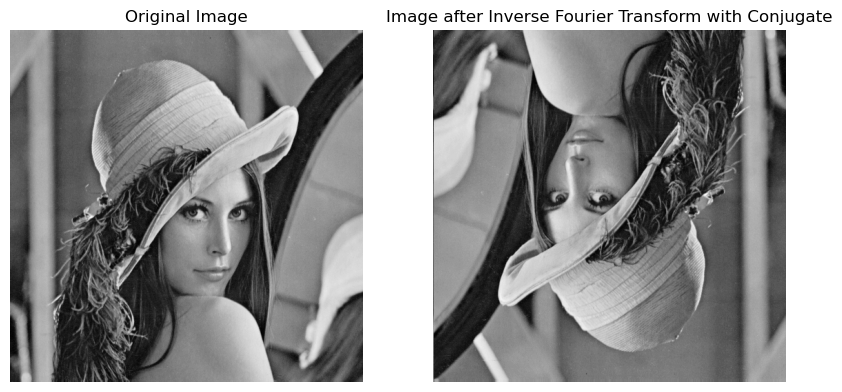

In [8]:
# 填入代码，并展示运行结果 
# 获取共轭复数  
conjugate = np.conj(fshift)  
  
# 对共轭复数进行傅里叶逆变换  
f_ishift = np.fft.ifftshift(conjugate)  
img_back = np.fft.ifft2(f_ishift)  
  
# 由于逆变换的结果是复数，我们取其实部作为最终的图像  
img_back = np.real(img_back)  
  
# 标准化到0-255范围并转换为uint8类型以显示图像  
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)  
  
# 显示原始图像和共轭逆变换后的图像  
plt.figure(figsize=(10, 5))  
  
plt.subplot(1, 2, 1)  
plt.imshow(img, cmap='gray')  
plt.title('Original Image')  
plt.axis('off')  
  
plt.subplot(1, 2, 2)  
plt.imshow(img_back, cmap='gray')  
plt.title('Image after Inverse Fourier Transform with Conjugate')  
plt.axis('off')  
  
plt.show()

 - 5）计算下面图像的傅里叶变换图像并分析变换域的特性

$$
\begin{array}{|c|c|c|c|}
\hline
0 & 0 & 0 & 12 \\
\hline
0 & 0 & 0 & 12 \\
\hline
0 & 0 & 0 & 12 \\
\hline
0 & 0 & 0 & 12 \\
\hline
\end{array}
$$

C:\Users\17339\AppData\Local\Temp\ipykernel_20912\905325338.py:9: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1]))


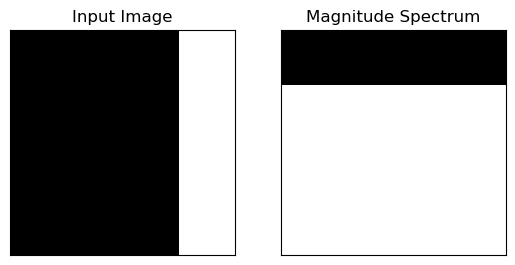

In [9]:
# 填入代码，并展示运行结果
# 输入原始图像矩阵
image = np.array([[0,0,0,12],[0,0,0,12],[0,0,0,12],[0,0,0,12]], dtype=np.float32)

# 进行二维离散傅里叶变换
dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

# 将复数矩阵转换为幅度谱图像
magnitude_spectrum = 20*np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1]))

# 显示原始图像和傅里叶变换图像
plt.subplot(121),plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

4. 平滑频域滤波
- 1）使用理想低通滤波器、巴特沃斯低通滤波器和高斯低通滤波器，截止频率自选。
- 2）读出一幅灰度图像（"lena_gray.gif"），分别采用理想低通滤波器、巴特沃斯低通滤波器和高斯低通滤波器对其进行滤波（截止频率自选），再做逆变换，观察不同的截止频率下采用不同低通滤波器得到的图像与原图像的区别，特别注意振铃效应。


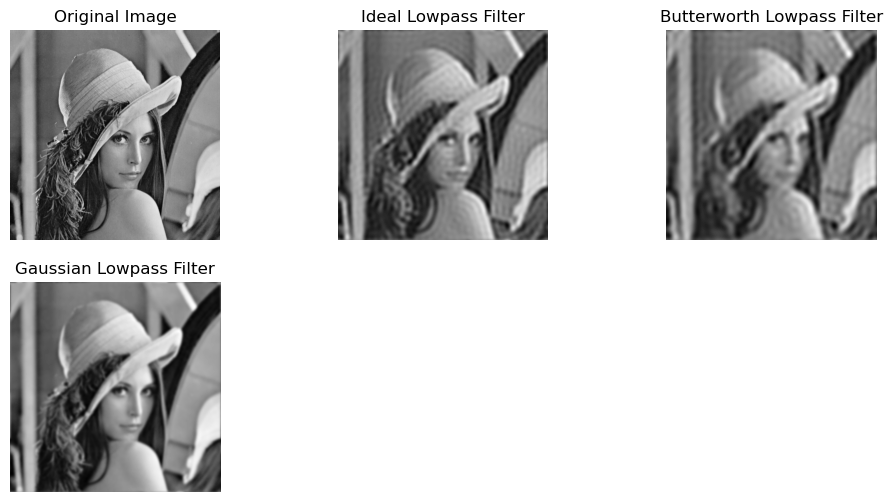

In [10]:
# 填入代码，并展示运行结果
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

f = fftshift(fft2(img))

# 创建理想低通滤波器
def ideal_lowpass_filter(shape, cutoff):
    rows, cols = shape
    mask = np.zeros((rows, cols), np.uint8)
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center_row)**2 + (j - center_col)**2) <= cutoff:
                mask[i, j] = 1
    return mask

# 创建巴特沃斯低通滤波器
def butterworth_lowpass_filter(shape, cutoff, n):
    rows, cols = shape
    mask = np.zeros((rows, cols), np.uint8)
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            mask[i, j] = 1 / (1 + (distance / cutoff)**(2*n))
    return mask


# 创建高斯低通滤波器
def gaussian_lowpass_filter(shape, cutoff):
    rows, cols = shape
    mask = np.zeros((rows, cols))
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            mask[i, j] = np.exp(-(distance**2) / (2 * (cutoff**2))).astype(np.float32)
    return mask

# 滤波器截止频率
cutoff = 32
# 应用理想低通滤波器
ideal_filter = ideal_lowpass_filter(img.shape, cutoff)
filtered_ideal = ifft2(ifftshift(f * ideal_filter)).real

# 应用巴特沃斯低通滤波器
n = 64
butterworth_filter = butterworth_lowpass_filter(img.shape, cutoff, n)
filtered_butterworth = ifft2(ifftshift(f * butterworth_filter)).real

# 应用高斯低通滤波器
gaussian_filter = gaussian_lowpass_filter(img.shape, cutoff)
filtered_gaussian = ifft2(ifftshift(f * gaussian_filter)).real

# 显示原始图像和滤波后的图像
plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(232), plt.imshow(filtered_ideal, cmap='gray')
plt.title('Ideal Lowpass Filter'), plt.axis('off')
plt.subplot(233), plt.imshow(filtered_butterworth, cmap='gray')
plt.title('Butterworth Lowpass Filter'), plt.axis('off')
plt.subplot(234), plt.imshow(filtered_gaussian, cmap='gray')
plt.title('Gaussian Lowpass Filter'), plt.axis('off')
plt.show()

5. 锐化频域滤波

- 1）使用理想高通滤波器、巴特沃斯高通滤波器和高斯高通滤波器，截止频率自选。
- 2）读出一幅灰度图像（"lena_gray.gif"），分别采用理想高通滤波器、巴特沃斯高通滤波器和高斯高通滤波器对其进行滤波（截止频率自选），再做逆变换，观察不同的截止频率下采用不同高通滤波器得到的图像与原图像的区别。



C:\Users\17339\AppData\Local\Temp\ipykernel_20912\3050162259.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i, j] = 1 / (1 + (cutoff / distance) ** (2 * order))


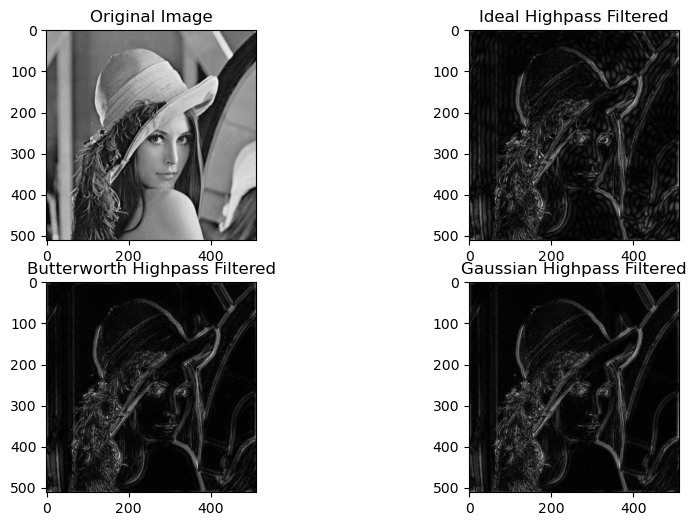

In [11]:
# 填入代码，并展示运行结果
def ideal_highpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow) ** 2 + (j - ccol) ** 2) > cutoff:
                mask[i, j] = 1
    return mask

def butterworth_highpass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 / (1 + (cutoff / distance) ** (2 * order))
    return mask

def gaussian_highpass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
            mask[i, j] = 1 - np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return mask

def apply_filter(image, filter):
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)
    f_filtered = f_shift * filter
    f_inv_shift = np.fft.ifftshift(f_filtered)
    f_inv_transform = np.fft.ifft2(f_inv_shift)
    f_inv_transform = np.abs(f_inv_transform)
    return f_inv_transform.astype(np.uint8)

# 设定截止频率
cutoff_frequency = 20

# 应用不同的滤波器
ideal_highpass = ideal_highpass_filter(img.shape, cutoff_frequency)
butterworth_highpass = butterworth_highpass_filter(img.shape, cutoff_frequency, order=2)
gaussian_highpass = gaussian_highpass_filter(img.shape, cutoff_frequency)

# 对图像应用滤波器并进行逆变换
lena_ideal_filtered = apply_filter(img, ideal_highpass)
lena_butterworth_filtered = apply_filter(img, butterworth_highpass)
lena_gaussian_filtered = apply_filter(img, gaussian_highpass)

# 显示结果
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(lena_ideal_filtered, cmap='gray')
plt.title('Ideal Highpass Filtered')
plt.subplot(2, 2, 3)
plt.imshow(lena_butterworth_filtered, cmap='gray')
plt.title('Butterworth Highpass Filtered')
plt.subplot(2, 2, 4)
plt.imshow(lena_gaussian_filtered, cmap='gray')
plt.title('Gaussian Highpass Filtered')
plt.show()
